In [1]:
import numpy as np
import torch

from analyst import Analyst
from config import ModelConfig, TrainerConfig
from dataset import load_dataset_manager

In [2]:
torch.manual_seed(24)
np.random.seed(24)

trainer_config = TrainerConfig(
    dataset_name="toydata", epochs=3, ignore_saved_model=True, load_model=False, batch_size=64
)
model_config = ModelConfig(d_model=64, lr=0.005, add_seq_embedding=True)

In [3]:
trainer_config

TrainerConfig(model_name='attentive2', dataset_name='toydata', epochs=3, batch_size=64, verbose=False, ignore_saved_model=True, load_model=False, save_model=True, load_dataset=True, save_dataset=True, cache_dir='cache/', dataset_dir='cache/dataset/')

In [4]:
model_config

ModelConfig(d_model=64, max_embedding_norm=None, window_size=8, negative_sample_size=5, lr=0.005, use_learnable_embedding=True, dropout=0.1, add_seq_embedding=True, add_positional_encoding=False)

In [5]:
dataset_manager = load_dataset_manager(
    dataset_name=trainer_config.dataset_name,
    dataset_dir=trainer_config.dataset_dir,
    load_dataset=trainer_config.load_dataset,
    save_dataset=trainer_config.save_dataset,
    window_size=model_config.window_size,
)

load cached dataset_manager from: cache/dataset/toydata.pickle


In [6]:
analyst = Analyst(
    dataset_manager=dataset_manager,
    trainer_config=trainer_config,
    model_config=model_config,
)

In [9]:
def on_epoch_start():
    analyst.similarity_between_seq_meta_and_item_meta(
        "gender", "M", "genre", method="attention", num_top_values=30
    )
    analyst.similarity_between_seq_meta_and_item_meta(
        "gender", "F", "genre", method="attention", num_top_values=30
    )

In [7]:
analyst.fit(show_fig=False, on_epoch_start=on_epoch_start)
on_epoch_start()

train start
similarity of seq meta: gender:M for meta: genre
0.0871 E5
0.0468 E1
-0.0134 F2
-0.0440 M3
-0.0482 E3
-0.0575 F4
-0.0577 F3
-0.0594 M5
-0.0606 M4
-0.0652 F5
-0.0728 M2
-0.0843 E2
-0.1026 F1
-0.1050 M1
-0.1303 E4
similarity of seq meta: gender:F for meta: genre
0.0869 E4
0.0600 F4
0.0514 M4
0.0354 E3
0.0251 F5
0.0226 M1
0.0175 F3
0.0165 M5
0.0033 M2
-0.0013 E2
-0.0069 F1
-0.0239 F2
-0.0485 M3
-0.0681 E1
-0.0777 E5


100%|██████████| 1688/1688 [00:03<00:00, 537.59it/s]


Epoch: 1, loss: 0.1742909758932594, test_loss: {'test': 0.2949624671755244}
saved best model to cache/best-toydata-attentive2.pt
similarity of seq meta: gender:M for meta: genre
3.1331 F4
2.7503 F5
2.6657 F1
2.6347 F2
2.4765 F3
0.8925 E3
0.7611 E2
0.5469 E4
0.4711 E5
0.3025 E1
-0.6006 M4
-0.8594 M3
-1.2329 M5
-1.2676 M2
-1.3727 M1
similarity of seq meta: gender:F for meta: genre
2.6060 F5
2.5689 F4
2.5021 F1
2.4371 F2
1.9736 F3
0.2013 E2
0.0980 E1
0.0474 E3
-0.0827 E5
-0.1364 E4
-3.5081 M4
-3.5141 M3
-3.5687 M2
-3.9986 M1
-4.0929 M5


100%|██████████| 1688/1688 [00:03<00:00, 561.05it/s]


Epoch: 2, loss: 0.12074755961614123, test_loss: {'test': 0.25235539522922434}
saved best model to cache/best-toydata-attentive2.pt
similarity of seq meta: gender:M for meta: genre
17.2629 F4
15.0238 F2
14.7830 F5
14.7186 F1
14.3125 F3
-0.7672 E3
-1.4694 E4
-1.8407 E2
-2.8898 E1
-3.2368 E5
-10.2513 M4
-10.3460 M1
-10.4000 M3
-10.8972 M5
-11.8694 M2
similarity of seq meta: gender:F for meta: genre
6.1462 F5
6.0468 F4
5.6439 F1
5.1559 F3
5.1124 F2
-3.2429 E4
-3.2816 E1
-3.7868 E2
-4.4023 E5
-4.6783 E3
-9.7382 M3
-10.1607 M4
-10.4108 M5
-10.5728 M1
-10.5741 M2


100%|██████████| 1688/1688 [00:03<00:00, 545.24it/s]

Epoch: 3, loss: 0.10701453017724713, test_loss: {'test': 0.2652494806831623}
train end
saved model to cache/toydata-attentive2.pt
similarity of seq meta: gender:M for meta: genre
16.8638 F4
15.5901 F1
14.5311 F3
14.3995 F2
14.3376 F5
1.9056 E4
1.2715 E3
0.7206 E5
0.3628 E2
0.1186 E1
-13.5402 M4
-14.5593 M3
-14.7161 M5
-15.7237 M1
-16.7570 M2
similarity of seq meta: gender:F for meta: genre
0.6540 F5
0.5341 F1
0.3017 F3
0.0045 E4
-0.1591 F4
-0.1853 F2
-0.7678 E5
-1.1491 E1
-1.4892 E3
-1.8698 E2
-2.9776 M4
-3.2895 M3
-3.2970 M1
-3.7731 M5
-4.5565 M2


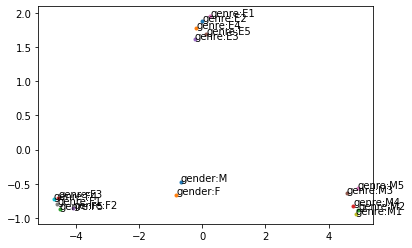

In [8]:
analyst.visualize_meta_embedding("gender", "genre", method="pca")